In [3]:
from PIL import Image, ImageDraw, ImageFont
HEIGHT, WIDTH = 480, 800
MAX_WIDTH_RATIO = 0.8

In [4]:
font = ImageFont.truetype("../fonts/CormorantGaramond-VariableFont_wght.ttf", 24)
italic_font = ImageFont.truetype("../fonts/CormorantGaramond-Italic-VariableFont_wght.ttf", 24)

font.set_variation_by_axes([500])

In [5]:
image = Image.new(mode='L', size=(WIDTH, HEIGHT), color=255)
draw = ImageDraw.Draw(image)

In [6]:
def draw_quote(quote: str, draw: ImageDraw, display_wh_px: tuple[int, int], max_width_ratio: float) -> None:
    max_line_width_px = int(display_wh_px[0] * max_width_ratio)
    words = quote.split()

    # Figure out whether each word belongs on the current line, or the next
    lines = []
    curr_line = ""
    for word in words:
        test_line = f"{curr_line} {word}".strip()
        bbox = draw.textbbox((0, 0), test_line, font=font)
        test_width_px = bbox[2] - bbox[0]
        if test_width_px <= max_line_width_px:
            curr_line = test_line
        else:
            lines.append(curr_line)
            curr_line = word

    # Handle trailing line
    if curr_line:
        lines.append(curr_line)
    
    # Figure out the text's height [px]
    line_height_px = font.getbbox("Ay")[3] - font.getbbox("Ay")[1]
    text_height_px = len(lines) * line_height_px
    y_offset = (display_wh_px[1] - text_height_px) // 2
    
    # Draw each line centered
    for line in lines:
        bbox = draw.textbbox((0, 0), line, font=font)
        line_width = bbox[2] - bbox[0]
        x = (display_wh_px[0] - line_width) // 2
        draw.text((x, y_offset), line, font=font, fill=0)
        y_offset += line_height_px

In [7]:
quote = "This is a long string that should automatically waaaaaaaaaaaaaaaaaaarap to the next line once it reaches a certain width limit."
draw_quote(quote, draw, (WIDTH, HEIGHT), 0.8)

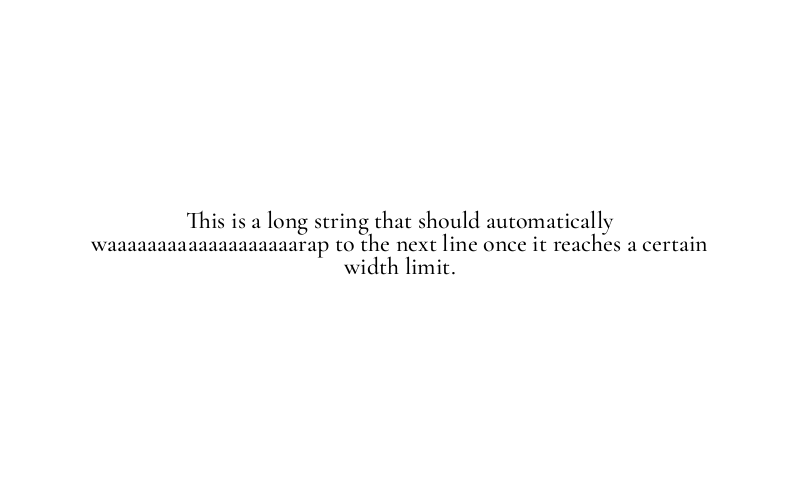

In [8]:
image